<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [ ]:
# текст запроса
query_3_1 = f'''
SELECT count(*) "Количество вакансий"
FROM vacancies
'''

In [ ]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
df_3_1

,Количество вакансий
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [ ]:
# текст запроса
query_3_2 = f'''
SELECT count(*) "Количество работодателей"
FROM employers
'''

In [ ]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2

,Количество работодателей
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [ ]:
# текст запроса
query_3_3 = f'''
SELECT count(*) "Количество регионов"
FROM areas
'''

In [ ]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3

,Количество регионов
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [ ]:
# текст запроса
query_3_4 = f'''
SELECT count(*) "Количество сфер деятельности"
FROM industries
'''

In [ ]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4

,Количество сфер деятельности
0,294


In [ ]:
# выводы по предварительному анализу данных

_Выводы по предварительному анализу данных:_
* _Всего в исследуемой базе данных 49 197 вакансий, представленных в 294 сферах деятельности, от 23 501 работодателя в 1 362 регионах._

***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [14]:
# текст запроса
query_4_1 = f'''
SELECT a.name "Регион",
       count(v.id) "Количество вакансий"
FROM vacancies v
JOIN areas a ON v.area_id=a.id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
'''

In [15]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

,Регион,Количество вакансий
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


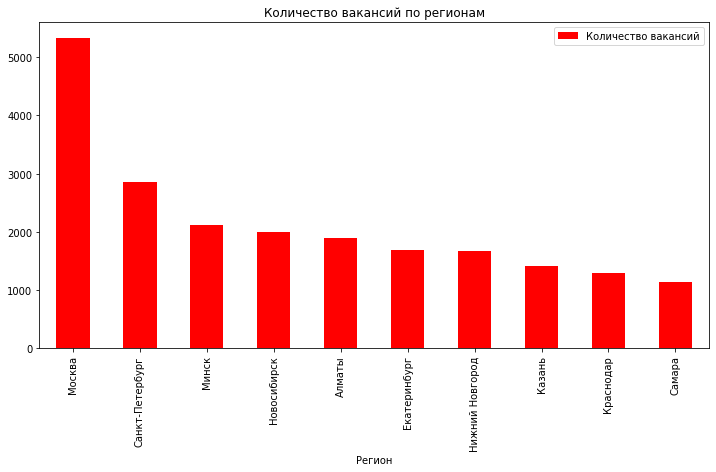

In [16]:
df_4_1.plot(
    x='Регион',
    figsize=(12,6),
    kind='bar',
    title='Количество вакансий по регионам',
    color='red'
    );

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# текст запроса
query_4_2 = f'''
SELECT count(*) "Количество вакансий"
FROM vacancies
WHERE salary_from IS NOT NULL
  OR salary_to IS NOT NULL
'''

In [ ]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

,Количество вакансий
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [ ]:
# текст запроса
query_4_3 = f'''
SELECT round(avg(salary_from)) "Нижняя граница средней ЗП",
       round(avg(salary_to)) "Верхняя граница средней ЗП"
FROM vacancies
'''

In [ ]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

,Нижняя граница средней ЗП,Верхняя граница средней ЗП
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [25]:
# текст запроса
query_4_4 = f'''
SELECT schedule "График работы",
       employment "Тип трудоустройства",
       count(*) "Количество вакансий"
FROM vacancies
GROUP BY 1,
         2
ORDER BY 3 DESC
'''

In [26]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

,График работы,Тип трудоустройства,Количество вакансий
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


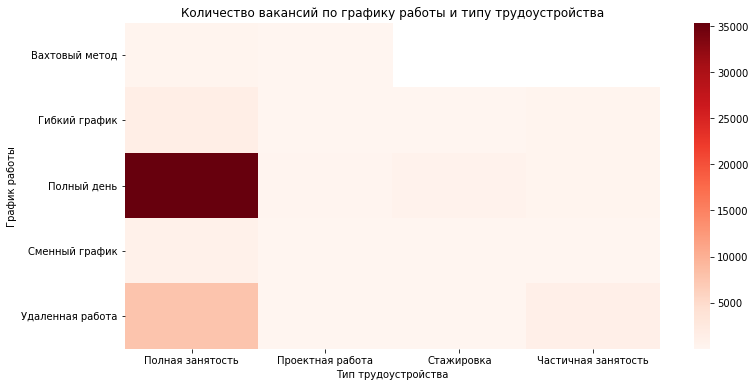

In [40]:
pivot = df_4_4.pivot_table(
    values='Количество вакансий',
    columns='Тип трудоустройства',
    index='График работы',
)
plt.figure(figsize=(12,6))
heatmap = sns.heatmap(data=pivot, cmap='Reds')
heatmap.set_title('Количество вакансий по графику работы и типу трудоустройства');

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [22]:
# текст запроса
query_4_5 = f'''
SELECT experience "Требуемый опыт работы",
       count(*) "Количество вакансий"
FROM vacancies
WHERE experience IS NOT NULL
GROUP BY 1
ORDER BY 2
'''

In [23]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

,Требуемый опыт работы,Количество вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


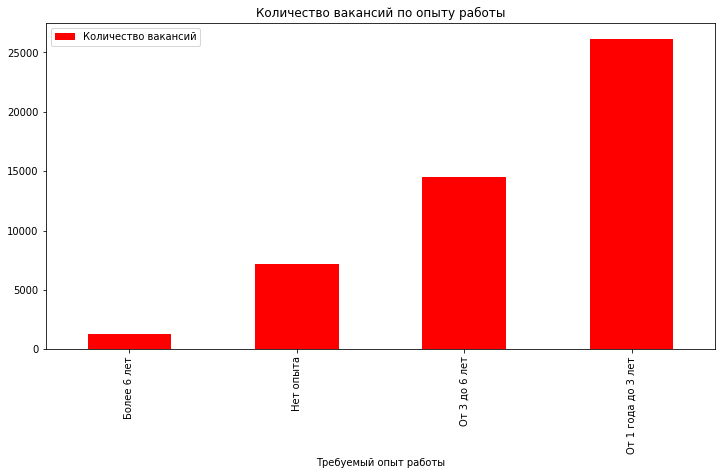

In [24]:
df_4_5.plot(
    x='Требуемый опыт работы',
    figsize=(12,6),
    kind='bar',
    title='Количество вакансий по опыту работы',
    color='red'
    );

In [ ]:
# выводы по детальному анализу вакансий

_Выводы по детальному анализу вакансий:_
* _В топ-5 по количеству вакансий входят крупнейшие по численности населения города России, Беларуси и Казахстана._
* _Самое большое количество вакансий в Москве - 5 333 вакансии, что почти в 2 раза больше, чем в Санкт-Петербурге (2 место в топ-5)._
* _49% (24 073 вакансии) из всех вакансий работодатели указывают уровень заработной платы._
* _При этом среднее значение нижней границы зарплатной вилки 71 065 руб., а верхней границы - 110 537 руб.._
* _72% (35 367 вакансий) из всех вакансий работодатели ищут сотрудников на полную занятость и полный день, 16% - на полную занятость и удалённую работу, 3% - на полную занятость и гибкий график._
* _53% (26 152 вакансии) из всех вакансий работодатели ищут сотрудников с опытом работы от 1 до 3 лет, 29% - с опытом работы от 3 до 6 лет, 15% - без опыта работы, 3% - с опытом более 6 лет._

***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query_5_1 = f'''
SELECT e.name "Работодатель",
       count(v.id) "Количество вакансий"
FROM employers e
JOIN vacancies v ON e.id=v.employer_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5
'''

In [ ]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1

,Работодатель,Количество вакансий
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# текст запроса
query_5_2 = f'''
SELECT a.name "Регион",
       count(e.id) "Количество работодателей",
       count(v.id) "Количество вакансий"
FROM public.areas a
LEFT JOIN employers e ON a.id=e.area
LEFT JOIN vacancies v ON a.id=v.area_id
WHERE v.id IS NULL
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1
'''

In [ ]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

,Регион,Количество работодателей,Количество вакансий
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
# текст запроса
query_5_3 = f'''
SELECT e.name "Работодатель",
       count(DISTINCT v.area_id) "Количество регионов"
FROM vacancies v
JOIN employers e ON v.employer_id=e.id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1
'''

In [ ]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

,Работодатель,Количество регионов
0,Яндекс,181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [ ]:
# текст запроса
query_5_4 = f'''
SELECT count(*) "Вакансии без сферы деятельности"
FROM employers e
LEFT JOIN public.employers_industries ei ON e.id=ei.employer_id
WHERE ei.industry_id IS NULL
'''

In [ ]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

,Вакансии без сферы деятельности
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [ ]:
# текст запроса
query_5_5 = f'''
SELECT e.name "Работодатель",
       count(ei.industry_id) "Количество сфер деятельности"
FROM employers e
LEFT JOIN employers_industries ei ON e.id=ei.employer_id
GROUP BY e.id
HAVING count(ei.industry_id)=4
ORDER BY 1
OFFSET 2
LIMIT 1
'''

In [ ]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

,Работодатель,Количество сфер деятельности
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [ ]:
# текст запроса
query_5_6 = f'''
SELECT count(ei.employer_id) "Количество работодателей"
FROM employers_industries ei
JOIN industries i ON ei.industry_id=i.id
WHERE i.name='Разработка программного обеспечения'
'''

In [ ]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

,Количество работодателей
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [18]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
table = pd.read_html(url)
milli_cities = pd.DataFrame(table[1])
milli_cities = tuple(milli_cities['Город'].replace('Воронеж[a]', 'Воронеж'))
milli_cities

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [19]:
# текст запроса
query_5_7 = f'''
SELECT a.name "Город",
       count(v.id) "Количество вакансий"
FROM employers e
JOIN vacancies v ON e.id=v.employer_id
JOIN areas a ON v.area_id=a.id
WHERE e.name='Яндекс'
  AND a.name in {milli_cities}
GROUP BY a.id
UNION ALL
SELECT 'Total',
       count(*)
FROM public.vacancies v
JOIN public.employers e ON e.id=v.employer_id
JOIN public.areas a ON a.id=v.area_id
WHERE e.name='Яндекс'
  AND a.name in {milli_cities}
ORDER BY 2
'''

In [20]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7

,Город,Количество вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


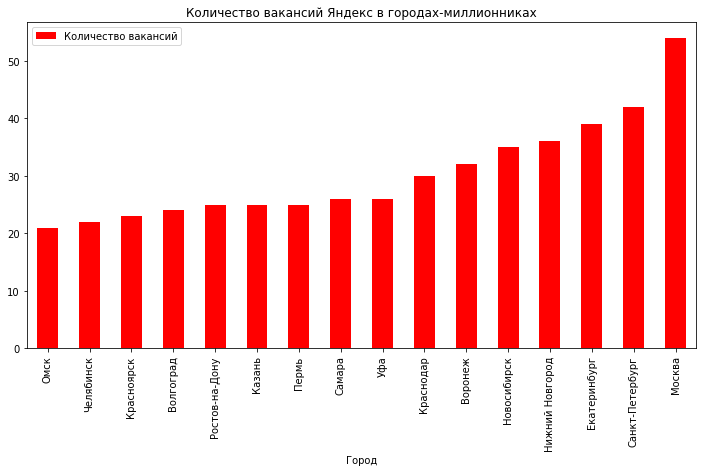

In [42]:
query_5_7_bar = f'''
SELECT a.name "Город",
       count(v.id) "Количество вакансий"
FROM employers e
JOIN vacancies v ON e.id=v.employer_id
JOIN areas a ON v.area_id=a.id
WHERE e.name='Яндекс'
  AND a.name in {milli_cities}
GROUP BY a.id
ORDER BY 2
'''
df_5_7_bar = pd.read_sql_query(query_5_7_bar, connection)
df_5_7_bar.plot(
    x='Город',
    figsize=(12,6),
    kind='bar',
    title='Количество вакансий Яндекс в городах-миллионниках',
    color='red'
    );

In [ ]:
# выводы по анализу работодателей

_Выводы по анализу работодателей:_
* _В топ-5 работодателей по количеству вакансий входят: "Яндекс" - 4% из всех вакансий, "Ростелеком" - 1%, "Тинькофф" - 0.9%, "Сбер" - 0.9%, "Газпром нефть" - 0.7%._
* _В регионе "Россия" самое большое количество работодателей при отсутствии размещённых в данном регионе вакансий._
* _"Яндекс" размещает вакансии в самом большом количестве  регионов (181 регион), "Ростелеком" - в 152 регионах, "Спецремонт" - в 116 регионах._
* _В 17% (8 419 вакансий) из всех вакансий работодатели не указывают сферу деятельности._
* _5% (1 138 работодателей) из всех работодатеелй указывают в вакансиях четыре сферы деятельности._
* _15% (3 553 работодателя) из всех работодатеелй указывают в сферах деятельности вакансии "Разработка программного обеспечения"._
* _25% (485 вакансий) из всех вакансий "Яндекс" представлены в российских городах-миллионниках._

***

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [ ]:
# текст запроса
query_6_1 = f'''
SELECT count(*) "Количество вакансий"
FROM vacancies
WHERE name ilike '%data%'
  OR name ilike '%данн%'
'''

In [ ]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

,Количество вакансий
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [ ]:
# текст запроса
query_6_2 = f'''
SELECT count(*) "Количество вакансий"
FROM vacancies
WHERE (name ilike '%data scientist%'
       OR name ilike '%data science%'
       OR name ilike '%исследователь данных%'
       OR (name like '%ML%'
           AND name not ilike '%HTML%')
       OR name ilike '%machine learning%'
       OR name ilike '%машинн%обучен%')
  AND (name ilike '%junior%'
       OR experience='Нет опыта'
       OR employment='Стажировка')
'''

In [ ]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

,Количество вакансий
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
query_6_3 = f'''
SELECT count(*) "Количество вакансий"
FROM vacancies
WHERE (name ilike '%data scientist%'
       OR name ilike '%data science%'
       OR name ilike '%исследователь данных%'
       OR (name like '%ML%'
           AND name not ilike '%HTML%')
       OR name ilike '%machine learning%'
       OR name ilike '%машинн%обучен%')
  AND (key_skills like '%SQL%'
       OR key_skills ilike '%postgres%')
'''

In [ ]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3

,Количество вакансий
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# текст запроса
query_6_4 = f'''
SELECT count(*) "Количество вакансий"
FROM vacancies
WHERE (name ilike '%data scientist%'
       OR name ilike '%data science%'
       OR name ilike '%исследователь данных%'
       OR (name like '%ML%'
           AND name not ilike '%HTML%')
       OR name ilike '%machine learning%'
       OR name ilike '%машинн%обучен%')
  AND key_skills ilike '%Python%'
'''

In [ ]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

,Количество вакансий
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
# текст запроса
query_6_5 = f'''
SELECT round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2) "Среднее количество навыков"
FROM vacancies
WHERE (name ilike '%data scientist%'
       OR name ilike '%data science%'
       OR name ilike '%исследователь данных%'
       OR (name like '%ML%'
           AND name not ilike '%HTML%')
       OR name ilike '%machine learning%'
       OR name ilike '%машинн%обучен%')
  AND key_skills IS NOT NULL
'''

In [ ]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5

,Среднее количество навыков
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [43]:
# текст запроса
query_6_6 = f'''
SELECT experience "Опыт работы",
       round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to))) "Средняя ЗП"
FROM vacancies
WHERE (name ilike '%data scientist%'
       OR name ilike '%data science%'
       OR name ilike '%исследователь данных%'
       OR (name like '%ML%'
           AND name not ilike '%HTML%')
       OR name ilike '%machine learning%'
       OR name ilike '%машинн%обучен%')
  AND (salary_from IS NOT NULL
       OR salary_to IS NOT NULL)
GROUP BY 1
'''

In [44]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

,Опыт работы,Средняя ЗП
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


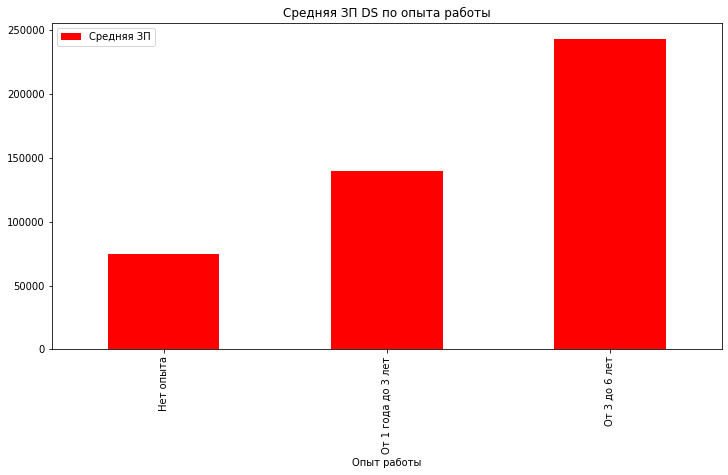

In [51]:
df_6_6.plot(
    x='Опыт работы',
    figsize=(12,6),
    kind='bar',
    title='Средняя ЗП DS по опыта работы',
    color='red'
    );

In [ ]:
# выводы по предметному анализу

_Выводы по предметному анализу:_
* _3.6% (1 771 вакансия) из всех вакансий имеют отношение к работе с данными._
* _2.9% (51 вакансия) из вакансий, имеющих отношение к работе с данными, подходит для начинающих дата-саентистов._
* _В 11.3% (201 вакансия) из вакансий, имеющих отношение к работе с данными, указан ключевой навык "SQL" или "postgres"._
* _В 19.8% (351 вакансия) из вакансий, имеющих отношение к работе с данными, указан ключевой навык "Python"._
* _В вакансиях для DS работодатели указывают в среднем 6 ключевых навыков._
* _В вакансиях для DS работодатели указывают в среднем заработную плату по типу требуемого опыта: без опыта работы - 74 643 руб., с опытом работы от 1 года до 3 лет - 139 675 руб., с опытом работы от 3 до 6 лет - 243 115 руб.._

***

# Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

_Общие выводы:_
* _11% из всех вакансий представлены в Москве._
* _В половине (49%) вакансий работодатели указывают уровень заработной платы._
* _В большинстве (72%) вакансий работодатели ищут сотрудников на полную занятость и полный день, на полную занятость и удалённую работу - в 4.5 раза меньше._
* _В половине (53%) вакансий работодатели ищут сотрудников с опытом работы от 1 до 3 лет, 29% - с опытом работы от 3 до 6 лет, 15% - без опыта работы, 3% - с опытом более 6 лет._
* _У "Яндекс" самое большое количество вакансий и количество регионов размещения вакансий._
* _25% вакансий "Яндекс" представлены в российских городах-миллионниках._
* _В 17% вакансий работодатели не указывают сферу деятельности._
* _15% работодателей указывают в сферах деятельности вакансии "Разработка программного обеспечения"._
* _3.6% вакансий имеют отношение к работе с данными. Из них в 11.3% вакансий указан ключевой навык "SQL" или "postgres", а в 19.8% вакансий - "Python"._
* _Заработная плата DS без опыта работы (74 643 руб.) соответствует нижней границе зарплатной вилки (71 065 руб.), с опытом от 1 года до 3 лет (139 675 руб.) превышает верхнюю границу зарплатной вилки (110 537 руб.) на 26%, а с опытом от 3 до 6 лет (243 115 руб.) - на 120%. В общем случае, при переходе на следующий уровень опыта работы средняя ЗП DS увеличивается более чем на 50%._

_Дополнительные исследования:_

In [ ]:
query_dop_1 = f'''
SELECT i.name "Сфера деятельности",
       round(avg(coalesce((v.salary_from+v.salary_to)/2, v.salary_from, v.salary_to, 0))) "Средняя ЗП",
       count(v.id) "Количество вакансий"
FROM vacancies v
JOIN employers_industries ei ON ei.employer_id=v.employer_id
JOIN industries i ON i.id = ei.industry_id
WHERE v.salary_from IS NOT NULL
  OR v.salary_to IS NOT NULL
GROUP BY 1
ORDER BY 2 DESC
LIMIT 15
'''
df_dop_1 = pd.read_sql_query(query_dop_1, connection)
df_dop_1

,Сфера деятельности,Средняя ЗП,Количество вакансий
0,"Агрохимия (продвижение, оптовая торговля)",381429.0,14
1,Агрохимия (производство),339875.0,16
2,Игорный бизнес,191905.0,20
3,Корма для животных (производство),168300.0,29
4,Зоомагазин,167613.0,31
5,Кадровые агентства,144530.0,711
6,"Лакокрасочная продукция, сырье (производство)",142803.0,26
7,"Бытовая химия, парфюмерия, косметика (произво...",130120.0,78
8,"Лакокрасочная продукция, сырье (продвижение, о...",128445.0,32
9,"Дорожно-строительная техника, сельскохозяйстве...",122878.0,90


* _Разработка программного обеспечения находится на 14 месте по размеру средней ЗП, указываемой работодателями._
* _Количество вакансий по разработке программного обеспечения в разы больше, чем в других сферах деятельности._

In [ ]:
query_dop_2 = f'''
SELECT a.name "Регион",
       round(avg(coalesce((v.salary_from+v.salary_to)/2, v.salary_from, v.salary_to, 0))) "Средняя ЗП",
       count(v.id) "Количество вакансий"
FROM vacancies v
JOIN areas a ON v.area_id=a.id
WHERE v.name ilike '%data%'
  OR v.name ilike '%данн%'
  AND (v.salary_from IS NOT NULL
       OR v.salary_to IS NOT NULL)
  AND (v.name ilike '%junior%'
       OR v.experience='Нет опыта'
       OR v.employment='Стажировка')
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
'''
df_dop_2 = pd.read_sql_query(query_dop_2, connection)
df_dop_2

,Регион,Средняя ЗП,Количество вакансий
0,Сербия,150000.0,6
1,Ростов (Ярославская область),140000.0,1
2,Королев,130000.0,1
3,Рязань,126250.0,2
4,Кипр,124766.0,9
5,Турция,120000.0,5
6,Ульяновск,108333.0,3
7,Испания,100000.0,3
8,Луховицы,97500.0,1
9,Коломна,97500.0,1


* _В топ-10 по средней ЗП для начинающих специалистов по работе с данными кроме российских городов также входят Сербия (1 место), Кипр (5 место), Турция (6 место), Испания (8 место)._
* _Интересно, что в топ-10 не входит ни один из российских городов-миллионников._

In [ ]:
query_dop_3 = f'''
SELECT a.name "Регион",
       round(avg(coalesce((v.salary_from+v.salary_to)/2, v.salary_from, v.salary_to, 0))) "Средняя ЗП",
       count(v.id) "Количество вакансий"
FROM vacancies v
JOIN areas a ON v.area_id=a.id
WHERE (v.name ilike '%data scientist%'
       OR v.name ilike '%data science%'
       OR v.name ilike '%исследователь данных%'
       OR (v.name like '%ML%'
           AND v.name not ilike '%HTML%')
       OR v.name ilike '%machine learning%'
       OR v.name ilike '%машинн%обучен%')
  AND (v.salary_from IS NOT NULL
       OR v.salary_to IS NOT NULL)
  AND (v.name ilike '%junior%'
       OR v.experience='Нет опыта'
       OR v.employment='Стажировка')
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
'''
df_dop_3 = pd.read_sql_query(query_dop_3, connection)
df_dop_3

,Регион,Средняя ЗП,Количество вакансий
0,Санкт-Петербург,87667.0,3
1,Новосибирск,80000.0,1
2,Москва,72500.0,1
3,Владивосток,70000.0,1
4,Пермь,60000.0,1
5,Ростов-на-Дону,50000.0,1
6,Екатеринбург,37000.0,1


* _В исследуемой базе данных всего 9 вакансий для начинающих DS, с указанной работодателями ЗП._
* _Санкт-Петербург находится на 1 месте по размеру средней ЗП и по количеству представленных вакансий._
* _При этом в Санкт-Петербурге и Новосибирске размер средней ЗП больше, чем средняя ЗП (74 643 рублей) для начинающих DS ("Нет опыта"), а в остальных городах - меньше._



---



_На основе представленной базы данных можно построить предсказательную модель определения средней заработной платы вакансии в зависимости от региона, сферы деятельности, требуемого опыта работы. Одна половина данных (с указанной ЗП) для обучения и валидации, другая половина (ЗП не указана) для предсказания._



---



_В продолжении исследования было бы интересно проследить динамику изменения количества вакансий и размера заработной платы во времени и взаимосвязь с макроэкономическими показателями._

In [ ]:
connection.close()